In [2]:
# Import Pandas Repository
import pandas as pd

# Read the dataset using read_excel function from Pandas
churn_dataset = pd.read_excel('turknetchurnekimanonim.xlsx')

# Show first a few rows of the data
churn_dataset.head(5)


,Unnamed: 0,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,...,DENVERGIRISTARIHI_3,DENVERCIKISTARIHI_3,DENVERKALDIGISURE_GUN_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3,CHURNTEST_DATE
0,0,212.0,İstanbul (Avrupa),939.0,SULTANGAZİ,E,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,10,87108,0,16.5013,272.1967,2020-10-31
1,1,212.0,İstanbul (Avrupa),420.0,SARIYER,K,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,1,90271,0,135.8656,185.5825,2020-10-31
2,2,262.0,Kocaeli,998.0,İZMİT,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,3,90112,0,1.8255,46.6458,2020-10-31
3,3,212.0,İstanbul (Avrupa),418.0,KÜÇÜKÇEKMECE,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,15,87588,1664,2.0288,42.0181,2020-10-31
4,4,212.0,İstanbul (Avrupa),425.0,BAYRAMPAŞA,E,A,2016-04-21,2020-10-02,54,...,NaN,NaN,0,0,0,0,0,0.0000,0.0000,2020-10-31


A    180341
K     11953
Name: DURUM, dtype: int64


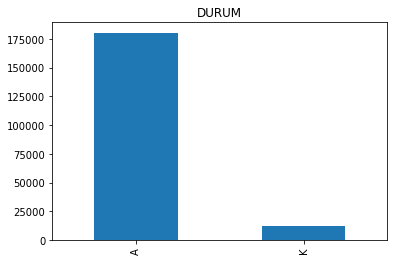

In [3]:
# check the DURUM column of data
print(churn_dataset.DURUM.value_counts())

# plot the values of DURUM
churn_dataset.DURUM.value_counts().plot(kind='bar', title='DURUM');

Before under sampling
0: 180341  1: 11953
After random under-sampling:
1    11953
0    11953
Name: DURUM, dtype: int64


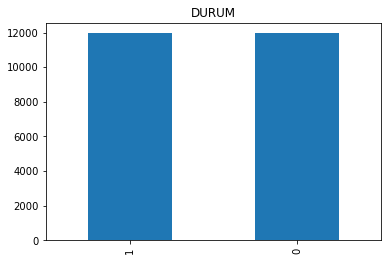

In [4]:
# Import label encoding function to digitize categorical values.
from sklearn.preprocessing import LabelEncoder

# apply label encoding for 'DURUM' column
labelEncoder = LabelEncoder()
churn_dataset['DURUM'] = labelEncoder.fit_transform(churn_dataset['DURUM'])

# undersampling to equalize 'DURUM' classes
DURUM_0, DURUM_1 = churn_dataset.DURUM.value_counts()
print("Before under sampling\n0:",DURUM_0," 1:",DURUM_1)

# Divide the data by class by 'DURUM' feature 
data_DURUM_0 = churn_dataset[churn_dataset['DURUM'] == 0]
data_DURUM_1 = churn_dataset[churn_dataset['DURUM'] == 1]


# undersampling for large data_DURUM_0 with length of data_DURUM_1
data_DURUM_0_undersampled = data_DURUM_0.sample(DURUM_1)

#combine the data_DURUM_0_undersampled and data_DURUM_1 as data
churn_dataset = pd.concat([data_DURUM_0_undersampled, data_DURUM_1], axis=0)

# clean the temporary objects
del data_DURUM_0
del data_DURUM_1
del data_DURUM_0_undersampled

# shuffle the rows of data
churn_dataset.sample(frac=1)

# check the data after undersampling
print('After random under-sampling:')
print(churn_dataset.DURUM.value_counts())

churn_dataset.DURUM.value_counts().plot(kind='bar', title='DURUM');

In [5]:
# Removing the columns which has only one unique value.

for col_name in churn_dataset.columns:
    if len(churn_dataset[col_name].unique()) == 1:
        churn_dataset = churn_dataset.drop(col_name,1)
        print("Freature '{col_name}' is removed from data because it has only one unique value".format(col_name=col_name))
churn_dataset.head()    

Freature 'HIZMETKANALI_SIKAYETSAYISI_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_DESTEKSAYISI_1' is removed from data because it has only one unique value
Freature 'HIZMETKANALI_TICKETKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'HIZMETKANALI_TICKETSL_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_DESTEKKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_TICKETSL_1' is removed from data because it has only one unique value
Freature 'OIMSIKAYET_DESTEKKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'OIMSIKAYET_TICKETSL_1' is removed from data because it has only one unique value
Freature 'BTK_SIKAYET_1' is removed from data because it has only one unique value
Freature 'DENVERGIRISTARIHI_1' is removed from data because it has only one unique value
Freature 'DENVERCIKISTARIHI_1' is remove

,Unnamed: 0,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
150279,150279,246.0,Isparta,382.0,MERKEZ,E,0,2020-02-10,NaT,8,...,0,0,0,0,0,4,89876,0,15.5561,225.2336
55418,55418,282.0,Tekirdağ,1007.0,SÜLEYMANPAŞA,E,0,2019-10-23,NaT,12,...,0,0,0,0,0,0,0,0,0.0000,0.0000
73880,73880,232.0,İzmir,440.0,BUCA,E,0,2019-12-25,NaT,10,...,0,0,0,0,0,4,89229,1448,4.2882,103.5108
135375,135375,212.0,İstanbul (Avrupa),416.0,KAĞITHANE,E,0,2020-01-15,NaT,9,...,0,0,0,0,0,2,89951,7826,5.4892,69.2088
55005,55005,212.0,İstanbul (Avrupa),407.0,BAKIRKÖY,E,0,2019-10-28,NaT,12,...,0,0,0,0,0,0,90531,8631,6.2215,69.3267


In [6]:
# decide which categorical variables you want to use in model
for col_name in churn_dataset.columns:
    type_name = churn_dataset[col_name].dtypes
    unique_cat = len(churn_dataset[col_name].unique())
    print("Feature '{col_name}'('{type_name}') has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat,type_name=type_name))

Feature 'Unnamed: 0'('int64') has 23906 unique categories
Feature 'ILTELKODU'('float64') has 83 unique categories
Feature 'ILADI'('object') has 83 unique categories
Feature 'POSILCE'('float64') has 1203 unique categories
Feature 'ILCE'('object') has 609 unique categories
Feature 'CINSIYET'('object') has 2 unique categories
Feature 'DURUM'('int64') has 2 unique categories
Feature 'ABONEBAS'('datetime64[ns]') has 1484 unique categories
Feature 'CLOSE_DATE'('datetime64[ns]') has 101 unique categories
Feature 'KALDIGI_AY_SAYISI'('int64') has 52 unique categories
Feature 'ODEMESEKLI'('object') has 2 unique categories
Feature 'ACIKLAMA'('object') has 16 unique categories
Feature 'FATURAGONDERIMTIPI'('object') has 3 unique categories
Feature 'RISKLIMUSTERI'('int64') has 2 unique categories
Feature 'YAPA_VAE'('object') has 2 unique categories
Feature 'KAPASITE'('int64') has 7 unique categories
Feature 'currentDown'('float64') has 5707 unique categories
Feature 'ARKADASINIGETIR'('float64') has 

In [7]:
# there are hundreds of different 'ILCE' values, it is meaningless to use this column.
# remove the unnecessary columns.
churn_dataset = churn_dataset.drop('ILCE',1)
churn_dataset = churn_dataset.drop('POSILCE',1)
churn_dataset = churn_dataset.drop('ILTELKODU',1)
churn_dataset = churn_dataset.drop('ILADI',1)
churn_dataset = churn_dataset.drop('ABONEBAS',1)
churn_dataset = churn_dataset.drop('CLOSE_DATE',1)
churn_dataset = churn_dataset.drop('Unnamed: 0',1)

churn_dataset

,CINSIYET,DURUM,KALDIGI_AY_SAYISI,ODEMESEKLI,ACIKLAMA,FATURAGONDERIMTIPI,RISKLIMUSTERI,YAPA_VAE,KAPASITE,currentDown,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
150279,E,0,8,K,(Bireysel)(Tam İletişim) 100 Mbps'e Kadar,E-ARŞİV,0,VAE,102400,83069.0,...,0,0,0,0,0,4,89876,0,15.5561,225.2336
55418,E,0,12,K,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,E-ARŞİV,0,VAE,35840,35839.0,...,0,0,0,0,0,0,0,0,0.0000,0.0000
73880,E,0,10,B,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,E-ARŞİV,0,VAE,35840,35840.0,...,0,0,0,0,0,4,89229,1448,4.2882,103.5108
135375,E,0,9,B,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,E-ARŞİV,0,VAE,35840,35836.0,...,0,0,0,0,0,2,89951,7826,5.4892,69.2088
55005,E,0,12,B,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,POSTA,0,VAE,35840,35836.0,...,0,0,0,0,0,0,90531,8631,6.2215,69.3267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,E,1,3,B,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,8967.0,...,0,0,0,0,0,2,94114,0,6.4082,113.3355
192248,E,1,3,B,(Bireysel)(Yalın) 16 Mbps'e kadar,E-ARŞİV,0,VAE,16384,0.0,...,4262,0,0,0,0,0,0,0,0.0000,0.0000
192270,E,1,3,B,(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar,E-ARŞİV,0,YAPA,102400,NaN,...,64468,1,0,0,0,4,3756,300,0.0578,0.3266
192282,E,1,3,K,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,35840.0,...,0,0,0,0,0,0,86462,0,2.0478,22.9172


In [ ]:
# check the 'ACIKLAMA' column's values. We can convert this feature to integer values depending on bandwidth.
churn_dataset['ACIKLAMA'].value_counts().sort_values(ascending=False).head(30)

In [8]:
# replacing the string values with integer values.

churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 16 Mbpse Kadar",
                                                              "(Bireysel)(Yalın) 16 Mbps'e kadar"],16)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 35 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 35 Mbps'e kadar"],35)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 75 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 75 Mbps'e kadar"],75)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar",
                                                              "(Bireysel)(Tam İletişim) 100 Mbps'e Kadar",
                                                              "(Bireysel)(TN Fiber) 100 Mbps",
                                                              "(Bireysel)(Yalın) 100 Mbps'e kadar",
                                                              "(Bireysel)(Yalın)(Yapa) 100 Mbps'e kadar",
                                                              "(Bireysel)(TT Fiber) 100 Mbps",
                                                              "(Bireysel)(Yalın)(TT Fiber) 100 Mbps"],100)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 50 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 50 Mbps'e kadar",],50)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(TN Fiber) 200 Mbps"],200)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(TN Fiber) 1000 Mbps"],1000)

35      13441
100      4422
16       4288
75       1266
50        485
1000        3
200         1
Name: ACIKLAMA, dtype: int64


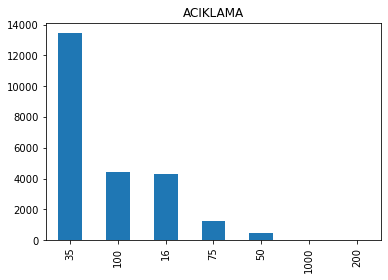

In [9]:
# check the 'ACIKLAMA' column again.
print(churn_dataset['ACIKLAMA'].value_counts().sort_values(ascending=False).head(12))

# plot the 'ACIKLAMA' column
churn_dataset.ACIKLAMA.value_counts().plot(kind='bar', title='ACIKLAMA');

In [10]:

# applying label encoding on the non-integer features.
churn_dataset['CINSIYET'] = labelEncoder.fit_transform(churn_dataset['CINSIYET'])
churn_dataset['ODEMESEKLI'] = labelEncoder.fit_transform(churn_dataset['ODEMESEKLI'])
churn_dataset['FATURAGONDERIMTIPI'] = labelEncoder.fit_transform(churn_dataset['FATURAGONDERIMTIPI'])
churn_dataset['RISKLIMUSTERI'] = labelEncoder.fit_transform(churn_dataset['RISKLIMUSTERI'])
churn_dataset['YAPA_VAE'] = labelEncoder.fit_transform(churn_dataset['YAPA_VAE'])
churn_dataset

,CINSIYET,DURUM,KALDIGI_AY_SAYISI,ODEMESEKLI,ACIKLAMA,FATURAGONDERIMTIPI,RISKLIMUSTERI,YAPA_VAE,KAPASITE,currentDown,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
150279,0,0,8,1,100,0,0,0,102400,83069.0,...,0,0,0,0,0,4,89876,0,15.5561,225.2336
55418,0,0,12,1,35,0,0,0,35840,35839.0,...,0,0,0,0,0,0,0,0,0.0000,0.0000
73880,0,0,10,0,35,0,0,0,35840,35840.0,...,0,0,0,0,0,4,89229,1448,4.2882,103.5108
135375,0,0,9,0,35,0,0,0,35840,35836.0,...,0,0,0,0,0,2,89951,7826,5.4892,69.2088
55005,0,0,12,0,35,2,0,0,35840,35836.0,...,0,0,0,0,0,0,90531,8631,6.2215,69.3267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,0,1,3,0,35,0,0,0,35840,8967.0,...,0,0,0,0,0,2,94114,0,6.4082,113.3355
192248,0,1,3,0,16,0,0,0,16384,0.0,...,4262,0,0,0,0,0,0,0,0.0000,0.0000
192270,0,1,3,0,100,0,0,1,102400,NaN,...,64468,1,0,0,0,4,3756,300,0.0578,0.3266
192282,0,1,3,1,35,0,0,0,35840,35840.0,...,0,0,0,0,0,0,86462,0,2.0478,22.9172


In [11]:
# check the missing data
churn_dataset.isnull().sum().sort_values(ascending=False).head()

ARKADASINIGETIR              16849
currentDown                    235
CM_TICKETSL_1                    0
TDU_TICKETKAPANMASURESI_1        0
TDU_TICKETSL_1                   0
dtype: int64

In [12]:
# fill the NaN values of 'currntDown' column with its mean value.
churn_dataset['currentDown'].fillna((churn_dataset['currentDown'].mean()), inplace=True)

# fill the NaN values of 'ARKADASINIGETIR' column with 0s.
churn_dataset['ARKADASINIGETIR'].fillna(0, inplace=True)


In [13]:
# check the missing data again
churn_dataset.isnull().sum().sort_values(ascending=False).head()

TOTALDOWNLOADGB_3            0
TDU_DESTEKSAYISI_2           0
CM_TICKETKAPANMASURESI_1     0
CM_TICKETSL_1                0
TDU_TICKETKAPANMASURESI_1    0
dtype: int64

In [14]:
# making feature selection from data.
# chooses most correlated features in respect to 'DURUM' column.

import statsmodels.api as sm

train_columns = list(set(list(churn_dataset)) - set(['DURUM']))
looked_columns = list(set(['DURUM']))
# Adding constant column of ones, mandatory for sm.OLS model

# divide the data as input(feature) part and output(target) part.
X = churn_dataset[train_columns].T.drop_duplicates().T
y = churn_dataset[looked_columns]

cols = list(X.columns)
pmax = 1

while(len(cols)>0):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y.astype(float),X_1.astype(float)).fit()
    p = pd.Series(model.pvalues[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break

# selected features by the algorithm.
selected_features = cols
print(selected_features)
len(selected_features)


['CM_TICKETSL_3', 'ARKADASINIGETIRILEGELENLER', 'TDU_TICKETSL_2', 'INTERNETEBAGLANAMIYORUM_TICKETSL_3', 'KALDIGI_AY_SAYISI', 'TOTALDOWNLOADGB_3', 'OIMSIKAYET_DESTEKSAYISI_1', 'CM_DESTEKSAYISI_2', 'PORTERROR_SAYISI_2', 'INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_1', 'CAGRIMERKEZIARAMASAYISI_3', 'RISKLIMUSTERI', 'TDU_TICKETKAPANMASURESI_1', 'FATURA_GECIKME_UCRETI_1', 'ACIKLAMA', 'OIMSIKAYET_DESTEKSAYISI_2', 'TDU_DESTEKSAYISI_3', 'CM_DESTEKSAYISI_1', 'INTERNETEBAGLANAMIYORUM_TICKETSL_1', 'FATURA_GECIKME_3', 'TDU_TICKETSL_3', 'TOTALUPLOADGB_1', 'FATURA_GECIKME_UCRETI_2', 'TOTALDOWNLOADGB_1', 'CM_TICKETKAPANMASURESI_2', 'MAX_SESSIONTIME_1', 'YAPA_VAE', 'currentDown', 'ADSLARIZA_TICKETKAPANMASURESI_1', 'CAGRIMERKEZIARAMASAYISI_1', 'FATURA_GECIKME_UCRETI_3', 'ARKADASINIGETIR', 'INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3', 'KAPASITE', 'INTERNETEBAGLANAMIYORUM_DESTEKSAYISI_3', 'CINSIYET', 'INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_2', 'PORTERROR_SAYISI_1', 'MIN_SESSIONTIME_1', 'IKNATICKET

65

In [15]:
X = X[selected_features]
X

,CM_TICKETSL_3,ARKADASINIGETIRILEGELENLER,TDU_TICKETSL_2,INTERNETEBAGLANAMIYORUM_TICKETSL_3,KALDIGI_AY_SAYISI,TOTALDOWNLOADGB_3,OIMSIKAYET_DESTEKSAYISI_1,CM_DESTEKSAYISI_2,PORTERROR_SAYISI_2,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_1,...,TDU_TICKETKAPANMASURESI_2,ADSLARIZA_TICKETSL_3,MAX_SESSIONTIME_3,ADSLARIZA_DESTEKSAYISI_2,CM_TICKETKAPANMASURESI_1,ADSLARIZA_TICKETSL_2,FATURA_GECIKME_1,CM_DESTEKSAYISI_3,OIMSIKAYET_DESTEKSAYISI_3,ADSLARIZA_DESTEKSAYISI_1
150279,0.0,1.0,0.0,0.0,8.0,225.2336,0.0,0.0,3.0,0.0,...,0.0,0.0,89876.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55418,0.0,1.0,0.0,0.0,12.0,0.0000,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
73880,0.0,0.0,0.0,0.0,10.0,103.5108,0.0,0.0,2.0,0.0,...,0.0,0.0,89229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135375,0.0,1.0,0.0,0.0,9.0,69.2088,0.0,0.0,1.0,0.0,...,0.0,0.0,89951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55005,0.0,0.0,0.0,0.0,12.0,69.3267,0.0,0.0,0.0,0.0,...,0.0,0.0,90531.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,0.0,0.0,0.0,0.0,3.0,113.3355,0.0,0.0,8.0,0.0,...,0.0,0.0,94114.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
192248,0.0,1.0,1.0,0.0,3.0,0.0000,24.0,0.0,24.0,0.0,...,15803.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,4.0,0.0
192270,0.0,0.0,0.0,0.0,3.0,0.3266,2.0,0.0,0.0,0.0,...,0.0,1.0,3756.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
192282,0.0,0.0,0.0,0.0,3.0,22.9172,0.0,0.0,2.0,0.0,...,0.0,0.0,86462.0,0.0,3039.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split

# divide the data as train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [17]:
# RandomForestClassifier Algorithm

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("{confusion_mat}".format(confusion_mat=confusion_mat))

<ipython-input-17-b86226cb37eb>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, Y_train)


Accuracy: %79.19687674288902
[[2925  679]
 [ 813 2755]]


In [19]:
# Multi Layer Perceptron Algorithm
from sklearn.neural_network import MLPClassifier

MLPmodel = MLPClassifier(random_state=1, max_iter=30)
MLPmodel.fit(X_train, Y_train)

Y_predicted = MLPmodel.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("Confusion Matrix:\n {confusion_mat}".format(confusion_mat=confusion_mat))

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: %65.74177356385945
Confusion Matrix:
 [[2733  871]
 [1586 1982]]


In [20]:
# K Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50,p=2)

knn.fit(X_train,Y_train)

Y_predicted = knn.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("Confusion Matrix: {confusion_mat}".format(confusion_mat=confusion_mat))

<ipython-input-20-dccda3ae3ebc>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,Y_train)


Accuracy: %66.94088120468489
Confusion Matrix: [[2907  697]
 [1674 1894]]


In [21]:
# Support Vector Machine Algorithm
from sklearn import svm

model_SVM = svm.SVC()
model_SVM = model_SVM.fit(X_train, Y_train)

Y_predicted = model_SVM.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 58.46346904629113
Confusion Matrix:


array([[1704, 1900],
       [1079, 2489]])

In [22]:
# Gradient Boosting Classifier Algorithm
from sklearn.ensemble import GradientBoostingClassifier

GBclassifier= GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=10, random_state=0)
GBclassifier.fit(X_train,Y_train)

Y_predict = GBclassifier.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 58.46346904629113
Confusion Matrix:


array([[1704, 1900],
       [1079, 2489]])

In [23]:
# Ada Boost Classifier Algorithm
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=500)
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 79.62911321807027
Confusion Matrix:


array([[2943,  661],
       [ 800, 2768]])

In [24]:
# KERAS Neural Network with Sigmoid Activation function

from keras.models import Sequential
from keras.layers import Dense

keras_model = Sequential()
keras_model.add(Dense(100, input_dim=len(selected_features), activation='sigmoid'))
keras_model.add(Dense(150, activation='sigmoid'))
keras_model.add(Dense(100, activation='sigmoid'))
keras_model.add(Dense(50, activation='sigmoid'))
keras_model.add(Dense(20, activation='sigmoid'))
keras_model.add(Dense(1, activation='sigmoid'))

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# compile the keras model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# normalize the data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# fit the keras model on the dataset
keras_model.fit(X_train_norm, Y_train, epochs=30, batch_size=30)

Y_predicted = keras_model.predict(X_test_norm)
Y_predicted = Y_predicted.round()

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

Epoch 1/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6923 - accuracy: 0.5151
Epoch 2/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6144 - accuracy: 0.6707
Epoch 3/30
558/558 [==============================] - 5s 9ms/step - loss: 0.5854 - accuracy: 0.6942
Epoch 4/30
558/558 [==============================] - 5s 9ms/step - loss: 0.5730 - accuracy: 0.7073
Epoch 5/30
558/558 [==============================] - 6s 10ms/step - loss: 0.5654 - accuracy: 0.7104
Epoch 6/30
558/558 [==============================] - 5s 10ms/step - loss: 0.5592 - accuracy: 0.7155
Epoch 7/30
558/558 [==============================] - 6s 11ms/step - loss: 0.5575 - accuracy: 0.7161
Epoch 8/30
558/558 [==============================] - 6s 11ms/step - loss: 0.5560 - accuracy: 0.7181
Epoch 9/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5546 - accuracy: 0.7210
Epoch 10/30
558/558 [==============================] - 6s 10ms/step - loss: 0.5544 - accuracy: 0

array([[ 363, 3241],
       [ 216, 3352]])

In [25]:
# KERAS Neural Network with Relu Activation function

keras_model = Sequential()
keras_model.add(Dense(100, input_dim=len(selected_features), activation='relu'))
keras_model.add(Dense(150, activation='relu'))
keras_model.add(Dense(100, activation='relu'))
keras_model.add(Dense(50, activation='relu'))
keras_model.add(Dense(20, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# compile the keras model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# normalize the data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# fit the keras model on the dataset
keras_model.fit(X_train_norm, Y_train, epochs=30, batch_size=30)

Y_predicted = keras_model.predict(X_test_norm)
Y_predicted = Y_predicted.round()

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

Epoch 1/30
558/558 [==============================] - 4s 8ms/step - loss: 0.5667 - accuracy: 0.7076
Epoch 2/30
558/558 [==============================] - 7s 13ms/step - loss: 0.5006 - accuracy: 0.7622
Epoch 3/30
558/558 [==============================] - 5s 9ms/step - loss: 0.4777 - accuracy: 0.7776
Epoch 4/30
558/558 [==============================] - 4s 8ms/step - loss: 0.4657 - accuracy: 0.7843
Epoch 5/30
558/558 [==============================] - 5s 9ms/step - loss: 0.4554 - accuracy: 0.7920
Epoch 6/30
558/558 [==============================] - 5s 9ms/step - loss: 0.4493 - accuracy: 0.7923
Epoch 7/30
558/558 [==============================] - 5s 9ms/step - loss: 0.4399 - accuracy: 0.7987
Epoch 8/30
558/558 [==============================] - 5s 9ms/step - loss: 0.4334 - accuracy: 0.8002
Epoch 9/30
558/558 [==============================] - 4s 8ms/step - loss: 0.4254 - accuracy: 0.8059
Epoch 10/30
558/558 [==============================] - 4s 8ms/step - loss: 0.4224 - accuracy: 0.809

array([[2450, 1154],
       [ 888, 2680]])